# Determines

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---


First of all, to observe the structure of the data and missing values, you can use exploratory data analysis and data visualization techniques.

You must do descriptive analysis. Because you must understand the relationship of the features to each other and clear the noise and missing values in the data. After that, the data set will be ready for RFM analysis.

Before starting the RFM Analysis, you will be asked to do some analysis regarding the distribution of *Orders*, *Customers* and *Countries*. These analyzes will help the company develop its sales policies and contribute to the correct use of resources.

You will notice that the UK not only has the most sales revenue, but also the most customers. So you will continue to analyze only UK transactions in the next RFM Analysis, Customer Segmentation and K-Means Clustering topics.

Next, you will begin RFM Analysis, a customer segmentation technique based on customers' past purchasing behavior. 

By using RFM Analysis, you can enable companies to develop different approaches to different customer segments so that they can get to know their customers better, observe trends better, and increase customer retention and sales revenues.

You will calculate the Recency, Frequency and Monetary values of the customers in the RFM Analysis you will make using the data consisting of UK transactions. Ultimately, you have to create an RFM table containing these values.

In the Customer Segmentation section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

We will segment the customers ourselves based on their recency, frequency, and monetary values. But can an **unsupervised learning** model do this better for us? You will use the K-Means algorithm to find the answer to this question. Then you will compare the classification made by the algorithm with the classification you have made yourself.

Before applying K-Means Clustering, you should do data pre-processing. In this context, it will be useful to examine feature correlations and distributions. In addition, the data you apply for K-Means should be normalized.

On the other hand, you should inform the K-means algorithm about the number of clusters it will predict. You will also try the *** Elbow method *** and *** Silhouette Analysis *** to find the optimum number of clusters.

After the above operations, you will have made cluster estimation with K-Means. You should visualize the cluster distribution by using a scatter plot. You can observe the properties of the resulting clusters with the help of the boxplot. Thus you will be able to tag clusters and interpret results.

Finally, you will do Cohort Analysis with the data you used at the beginning, regardless of the analysis you have done before. Cohort analysis is a subset of behavioral analytics that takes the user data and breaks them into related groups for analysis. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.


# #Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering
- Create Cohort and Conduct Cohort Analysis

# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

In [5]:
df[['InvoiceNo', 'Quantity', 'UnitPrice']].head(20)

,InvoiceNo,Quantity,UnitPrice
0,536365,6,2.55
1,536365,6,3.39
2,536365,8,2.75
3,536365,6,3.39
4,536365,6,3.39
5,536365,2,7.65
6,536365,6,4.25
7,536366,6,1.85
8,536366,6,1.85
9,536367,32,1.69


In [6]:
df.groupby('InvoiceNo').count()[['Quantity', 'UnitPrice']]

,Quantity,UnitPrice
InvoiceNo,,
536365,7,7
536366,2,2
536367,12,12
536368,4,4
536369,1,1
...,...,...
C581484,1,1
C581490,2,2
C581499,1,1


In [7]:
df['InvoiceNo'].nunique()

25900

In [8]:
df[['InvoiceNo', 'Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [9]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


### ii. What does the letter "C" in the InvoiceNo column mean?

In [10]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order.

In [11]:
df[df['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


When we filter canceled orders by Quantity> 0 or filter non-canceled orders by Quantity <0 nothing returns, this confirms that negative values mean the order was canceled. So lets find out how many orders were cancelled?

In [12]:
df['InvoiceNo'] = df['InvoiceNo'].apply(str)

In [13]:
df[(df['Quantity'] < 0) & (df['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


#### 9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


### iii. Handling Missing Values

In [14]:
df[(df['UnitPrice'] < 0) & ~(df['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [15]:
df[(df['Quantity'] < 0) & ~(df['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [16]:
df[(df['Quantity'] < 0) & ~(df['InvoiceNo'].str.contains('C'))]['CustomerID'].value_counts(dropna = False)

NaN    1336
Name: CustomerID, dtype: int64

In [17]:
df['CustomerID'].value_counts(dropna = False)

NaN        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
16148.0         1
16144.0         1
16138.0         1
16093.0         1
17948.0         1
Name: CustomerID, Length: 4373, dtype: int64

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 


### iv. Clean the Data from the Noise and Missing Values

In [18]:
df = df.dropna(subset = ['CustomerID'])

In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### v. Explore the Orders


1. Find the unique number of InvoiceNo  per customer

In [20]:
df.groupby(['CustomerID', 'InvoiceNo']).count()

StockCode  Description  Quantity  InvoiceDate  \
CustomerID InvoiceNo                                                  
12346.0    541431             1            1         1            1   
           C541433            1            1         1            1   
12347.0    537626            31           31        31           31   
           542237            29           29        29           29   
           549222            24           24        24           24   
...                         ...          ...       ...          ...   
18283.0    579673            52           52        52           52   
           580872            50           50        50           50   
18287.0    554065            29           29        29           29   
           570715            38           38        38           38   
           573167             3            3         3            3   

                      UnitPrice  Country  
CustomerID InvoiceNo                      
12346.0    541431             1        1  
           C541433            1        1  
12347.0    537626            31       31  
           542237            29       29  
           549222            24       24  
...                         ...      ...  
18283.0    579673            52       52  
           580872            50       50  
18287.0    554065            29       29  
           570715            38       38  
           573167             3        3  

[22190 rows x 6 columns]

In [21]:
df.groupby('CustomerID').count()[['InvoiceNo']]

,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


In [22]:
df[df['CustomerID'] == 12347.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347.0,Iceland


In [23]:
df.groupby(['CustomerID']).count()['StockCode']

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: StockCode, Length: 4372, dtype: int64

In [24]:
df.groupby(['InvoiceNo']).count()['StockCode']

InvoiceNo
536365      7
536366      2
536367     12
536368      4
536369      1
           ..
C581484     1
C581490     2
C581499     1
C581568     1
C581569     2
Name: StockCode, Length: 22190, dtype: int64

Let's see how this compares to the number of unique products per customer.

In [25]:
df.groupby(['StockCode']).nunique()['CustomerID']

StockCode
10002     40
10080     19
10120     25
10125     49
10133    101
        ... 
D         24
DOT        1
M        276
PADS       4
POST     379
Name: CustomerID, Length: 3684, dtype: int64

In [26]:
df[df['StockCode'] == 10002].shape

(49, 8)

In [27]:
df[df['StockCode'] == 10002]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom
7598,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05 11:02:00,0.85,13069.0,United Kingdom
10168,537227,10002,INFLATABLE POLITICAL GLOBE,24,2010-12-06 08:42:00,0.85,17677.0,United Kingdom
17604,537770,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-08 12:24:00,0.85,15529.0,United Kingdom
20617,538069,10002,INFLATABLE POLITICAL GLOBE,8,2010-12-09 14:08:00,0.85,16795.0,United Kingdom
21507,538086,10002,INFLATABLE POLITICAL GLOBE,10,2010-12-09 14:44:00,0.85,12872.0,United Kingdom
21551,538093,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-09 14:49:00,0.85,12682.0,France
22380,538167,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-09 18:58:00,0.85,14713.0,United Kingdom


### vi. Explore Customers by Country

1. What's the total revenue per country?

In [28]:
df.groupby('Country').describe()

Quantity                                               \
                         count       mean         std      min    25%   50%   
Country                                                                       
Australia               1259.0  66.444003   97.686932   -120.0   6.00  24.0   
Austria                  401.0  12.037406   21.745485    -48.0   6.00   9.0   
Bahrain                   17.0  15.294118   24.959379      2.0   6.00   6.0   
Belgium                 2069.0  11.189947   13.601441    -12.0   4.00  10.0   
Brazil                    32.0  11.125000    8.476723      2.0   3.00  10.0   
Canada                   151.0  18.298013   46.682587      1.0   6.00  12.0   
Channel Islands          758.0  12.505277   22.570877     -2.0   4.00  10.0   
Cyprus                   622.0  10.155949   23.263590    -33.0   2.00   5.0   
Czech Republic            30.0  19.733333   22.813990    -24.0  12.00  24.0   
Denmark                  389.0  21.048843   27.402502    -25.0  12.00  12.0   
EIRE                    7485.0  18.213627   42.025703   -288.0   4.00  10.0   
European Community        61.0   8.147541    6.546847     -2.0   3.00   6.0   
Finland                  695.0  15.346763   21.001421    -27.0   6.00  10.0   
France                  8491.0  12.936992   21.459204   -250.0   5.00  10.0   
Germany                 9495.0  12.369458   17.865719   -288.0   5.00  10.0   
Greece                   146.0  10.657534    7.724067     -1.0   5.25  10.0   
Iceland                  182.0  13.505495   18.856172      2.0   6.00  12.0   
Israel                   250.0  15.960000   16.730512    -32.0   4.00  12.0   
Italy                    803.0   9.961395   13.579809    -12.0   4.00   6.0   
Japan                    358.0  70.441341  177.191079   -624.0   4.00  36.0   
Lebanon                   45.0   8.577778    4.314294      2.0   6.00   8.0   
Lithuania                 35.0  18.628571   10.137542      6.0  12.00  16.0   
Malta                    127.0   7.433071    8.069726     -4.0   3.00   6.0   
Netherlands             2371.0  84.406580  111.369151   -480.0  16.00  72.0   
Norway                  1086.0  17.722836   22.644876    -12.0   6.00  12.0   
Poland                   341.0  10.712610   10.174628     -6.0   4.00  10.0   
Portugal                1480.0  10.840541   11.914967    -12.0   3.75  10.0   
RSA                       58.0   6.068966    3.329096      1.0   3.00   6.0   
Saudi Arabia              10.0   7.500000    5.720334     -5.0   6.00   9.0   
Singapore                229.0  22.855895   27.742886     -1.0   8.00  12.0   
Spain                   2533.0  10.589814   24.130396   -288.0   3.00   6.0   
Sweden                   462.0  77.136364  128.891540   -240.0   8.00  20.0   
Switzerland             1877.0  15.864678   19.293265   -120.0   6.00  12.0   
USA                      291.0   3.553265   16.450545    -36.0 -10.00   5.0   
United Arab Emirates      68.0  14.441176   12.474909      1.0   6.00  12.0   
United Kingdom        361878.0  11.077029  263.129266 -80995.0   2.00   4.0   
Unspecified              244.0   7.331967    8.895856      1.0   1.00   2.0   

                                     UnitPrice              ...        \
                        75%      max     count        mean  ...   75%   
Country                                                     ...         
Australia              96.0   1152.0    1259.0    3.220612  ...  3.75   
Austria                12.0    288.0     401.0    4.243192  ...  4.15   
Bahrain                 8.0     96.0      17.0    4.644118  ...  4.95   
Belgium                12.0    272.0    2069.0    3.644335  ...  4.15   
Brazil                 18.0     24.0      32.0    4.456250  ...  6.75   
Canada                 20.0    504.0     151.0    6.030331  ...  2.95   
Channel Islands        12.0    407.0     758.0    4.932124  ...  6.25   
Cyprus                 12.0    288.0     622.0    6.302363  ...  4.95   
Czech Republic         24.0     72.0      30.0    2.938333

In [29]:
df['Total Price'] = df['Quantity'] * df['UnitPrice']

In [30]:
df.groupby('Country').sum()[['Total Price']].T

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Total Price,137077.27,10154.32,548.4,40910.96,1143.6,3666.38,20086.29,12946.29,707.72,18768.14,...,1002.31,131.17,9120.39,54774.58,36595.91,55739.4,1730.92,1902.28,6.767873e+06,2667.07


2. Visualize number of customer per country

<AxesSubplot:ylabel='Country'>

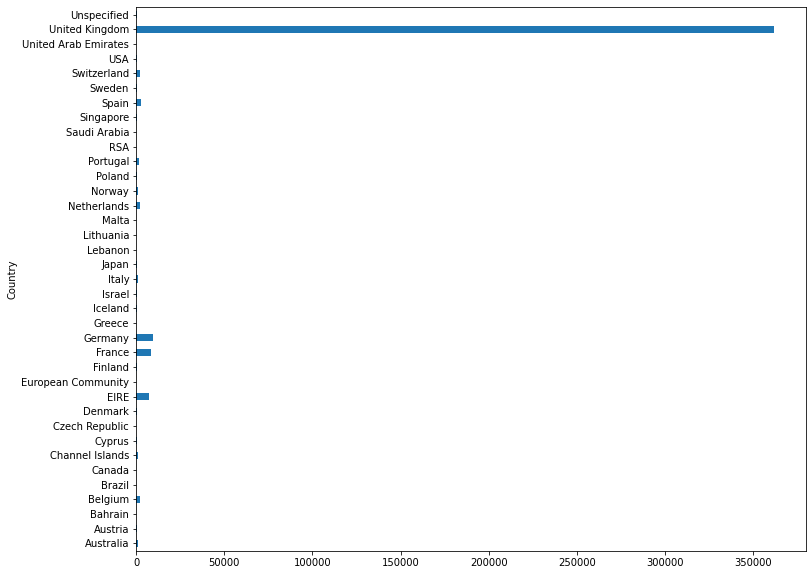

In [31]:
plt.figure(figsize=(12,10))
df.groupby('Country').count()['CustomerID'].plot.barh()

3. Visualize total cost per country

<AxesSubplot:ylabel='Country'>

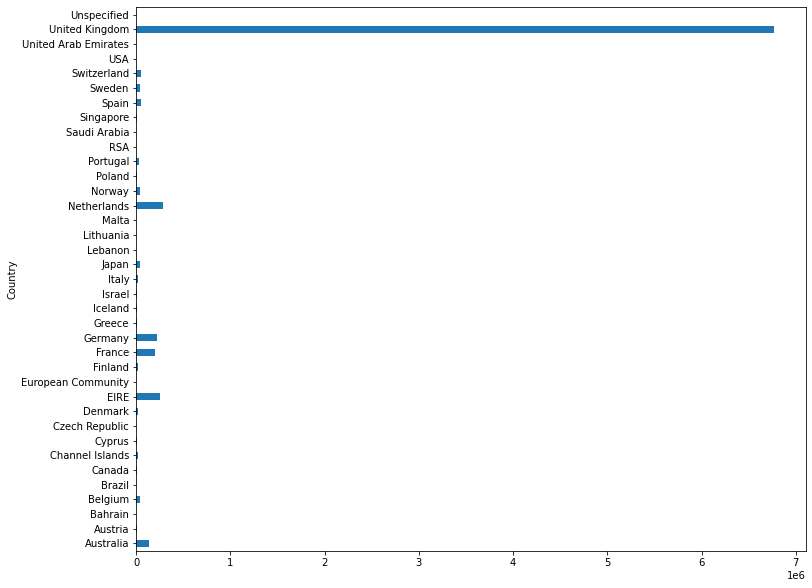

In [32]:
plt.figure(figsize=(12,10))
df.groupby('Country').sum()['Total Price'].plot.barh()

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Explore the UK Market


1. Create df_uk DataFrame

In [33]:
df_uk = df[df['Country'] == 'United Kingdom']

In [34]:
df_uk.drop('Country', axis = 1, inplace = True)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


2. What are the most popular products that are bought in the UK?

In [35]:
df_uk.groupby(['StockCode', 'Description']).sum()[['Quantity']].sort_values('Quantity', ascending=False).head()

,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,47982
85099B,JUMBO BAG RED RETROSPOT,40880
84879,ASSORTED COLOUR BIRD ORNAMENT,32679
85123A,WHITE HANGING HEART T-LIGHT HOLDER,32097
22197,POPCORN HOLDER,28562


### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

In [36]:
df_uk.drop(['StockCode', 'Description', 'Quantity', 'UnitPrice'], axis = 1, inplace = True)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df_uk.head()

,InvoiceNo,InvoiceDate,CustomerID,Total Price
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [38]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   InvoiceDate  361878 non-null  datetime64[ns]
 2   CustomerID   361878 non-null  float64       
 3   Total Price  361878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 13.8+ MB


In [39]:
df_uk.head(15)

,InvoiceNo,InvoiceDate,CustomerID,Total Price
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
5,536365,2010-12-01 08:26:00,17850.0,15.30
6,536365,2010-12-01 08:26:00,17850.0,25.50
7,536366,2010-12-01 08:28:00,17850.0,11.10
8,536366,2010-12-01 08:28:00,17850.0,11.10
9,536367,2010-12-01 08:34:00,13047.0,54.08


### Make group with InvoiceNo and InvoiceDate for dataframe, and use aggragate functions to create RFM

In [40]:
df_uk.groupby(['InvoiceNo', 'InvoiceDate']).agg({'CustomerID' : 'min', 'Total Price' : 'sum'})

,,CustomerID,Total Price
InvoiceNo,InvoiceDate,,
536365,2010-12-01 08:26:00,17850.0,139.12
536366,2010-12-01 08:28:00,17850.0,22.20
536367,2010-12-01 08:34:00,13047.0,278.73
536368,2010-12-01 08:34:00,13047.0,70.05
536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...
C581484,2011-12-09 09:27:00,16446.0,-168469.60
C581490,2011-12-09 09:57:00,14397.0,-32.53
C581499,2011-12-09 10:28:00,15498.0,-224.69


In [41]:
df_uk = df_uk.groupby(['InvoiceNo', 'InvoiceDate']).agg({'CustomerID' : 'min', 'Total Price' : 'sum'})

In [42]:
df_uk.reset_index(inplace = True)

In [43]:
df_uk

,InvoiceNo,InvoiceDate,CustomerID,Total Price
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
19880,C581484,2011-12-09 09:27:00,16446.0,-168469.60
19881,C581490,2011-12-09 09:57:00,14397.0,-32.53
19882,C581499,2011-12-09 10:28:00,15498.0,-224.69
19883,C581568,2011-12-09 11:57:00,15311.0,-54.75


In [44]:
df_uk[df_uk['InvoiceNo'] == '536591']

,InvoiceNo,InvoiceDate,CustomerID,Total Price
109,536591,2010-12-01 16:57:00,14606.0,159.26
110,536591,2010-12-01 16:58:00,14606.0,39.06


In [45]:
df[df['InvoiceNo'] == '536591']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
2421,536591,21427,SKULLS STORAGE BOX SMALL,1,2010-12-01 16:57:00,2.10,14606.0,United Kingdom,2.10
2422,536591,22135,LADLE LOVE HEART PINK,1,2010-12-01 16:57:00,0.42,14606.0,United Kingdom,0.42
2423,536591,90214M,"LETTER ""M"" BLING KEY RING",1,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,1.25
2424,536591,90214V,"LETTER ""V"" BLING KEY RING",1,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,1.25
2425,536591,90214S,"LETTER ""S"" BLING KEY RING",1,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,1.25
2426,536591,90214J,"LETTER ""J"" BLING KEY RING",2,2010-12-01 16:57:00,1.25,14606.0,United Kingdom,2.50
2427,536591,22386,JUMBO BAG PINK POLKADOT,1,2010-12-01 16:57:00,1.95,14606.0,United Kingdom,1.95
2428,536591,22378,WALL TIDY RETROSPOT,1,2010-12-01 16:57:00,2.10,14606.0,United Kingdom,2.10
2429,536591,20750,RED RETROSPOT MINI CASES,1,2010-12-01 16:57:00,7.95,14606.0,United Kingdom,7.95
2430,536591,21888,BINGO SET,1,2010-12-01 16:57:00,3.75,14606.0,United Kingdom,3.75


In [46]:
df_uk['Date'] = '2011-12-19'

In [47]:
df_uk['Date'] = pd.to_datetime(df_uk['Date'])

In [48]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'].dt.date)

In [49]:
df_uk.head()

,InvoiceNo,InvoiceDate,CustomerID,Total Price,Date
0,536365,2010-12-01,17850.0,139.12,2011-12-19
1,536366,2010-12-01,17850.0,22.20,2011-12-19
2,536367,2010-12-01,13047.0,278.73,2011-12-19
3,536368,2010-12-01,13047.0,70.05,2011-12-19
4,536369,2010-12-01,13047.0,17.85,2011-12-19


In [50]:
df_uk['Days'] = (df_uk['Date'] - df_uk['InvoiceDate']).dt.days

In [51]:
df_uk.head()

,InvoiceNo,InvoiceDate,CustomerID,Total Price,Date,Days
0,536365,2010-12-01,17850.0,139.12,2011-12-19,383
1,536366,2010-12-01,17850.0,22.20,2011-12-19,383
2,536367,2010-12-01,13047.0,278.73,2011-12-19,383
3,536368,2010-12-01,13047.0,70.05,2011-12-19,383
4,536369,2010-12-01,13047.0,17.85,2011-12-19,383


In [52]:
df_uk.groupby('CustomerID').min()['Days']

CustomerID
12346.0    335
12747.0     12
12748.0     10
12749.0     13
12820.0     13
          ... 
18280.0    287
18281.0    190
18282.0     17
18283.0     13
18287.0     52
Name: Days, Length: 3950, dtype: int64

In [53]:
df_uk.head()

,InvoiceNo,InvoiceDate,CustomerID,Total Price,Date,Days
0,536365,2010-12-01,17850.0,139.12,2011-12-19,383
1,536366,2010-12-01,17850.0,22.20,2011-12-19,383
2,536367,2010-12-01,13047.0,278.73,2011-12-19,383
3,536368,2010-12-01,13047.0,70.05,2011-12-19,383
4,536369,2010-12-01,13047.0,17.85,2011-12-19,383


In [54]:
df_uk.drop(['InvoiceDate', 'Date'], axis = 1, inplace = True)

In [55]:
df_uk

,InvoiceNo,CustomerID,Total Price,Days
0,536365,17850.0,139.12,383
1,536366,17850.0,22.20,383
2,536367,13047.0,278.73,383
3,536368,13047.0,70.05,383
4,536369,13047.0,17.85,383
...,...,...,...,...
19880,C581484,16446.0,-168469.60,10
19881,C581490,14397.0,-32.53,10
19882,C581499,15498.0,-224.69,10
19883,C581568,15311.0,-54.75,10


### Create Cancel Column for 'C' in InvoiceNo. So this column will hekp for Frequency, C = -1, Other = 1.

In [56]:
df_uk['Cancel'] = df_uk['InvoiceNo'].str.extract('(\w)')

In [57]:
df_uk['Cancel'].value_counts(dropna = False)

5    16676
C     3209
Name: Cancel, dtype: int64

In [58]:
df_uk['Cancel'] = df_uk['Cancel'].map({'5':1,  'C':-1})

In [59]:
df_uk

,InvoiceNo,CustomerID,Total Price,Days,Cancel
0,536365,17850.0,139.12,383,1
1,536366,17850.0,22.20,383,1
2,536367,13047.0,278.73,383,1
3,536368,13047.0,70.05,383,1
4,536369,13047.0,17.85,383,1
...,...,...,...,...,...
19880,C581484,16446.0,-168469.60,10,-1
19881,C581490,14397.0,-32.53,10,-1
19882,C581499,15498.0,-224.69,10,-1
19883,C581568,15311.0,-54.75,10,-1


### Creating RFM

In [60]:
df_uk.groupby('CustomerID').agg({'Days' : 'min', 'Cancel' : 'sum', 'Total Price' : 'sum'})

,Days,Cancel,Total Price
CustomerID,,,
12346.0,335,0,0.00
12747.0,12,11,4196.01
12748.0,10,197,29072.10
12749.0,13,2,3868.20
12820.0,13,4,942.34
...,...,...,...
18280.0,287,1,180.60
18281.0,190,1,80.82
18282.0,17,1,176.60


In [61]:
df_uk = df_uk.groupby('CustomerID').agg({'Days' : 'min', 'Cancel' : 'sum', 'Total Price' : 'sum'})

In [62]:
df_uk = df_uk.rename(columns = {'Days':'Recency', 'Cancel':'Frequency', 'Total Price':'Monetary'})

In [63]:
df_uk

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,335,0,0.00
12747.0,12,11,4196.01
12748.0,10,197,29072.10
12749.0,13,2,3868.20
12820.0,13,4,942.34
...,...,...,...
18280.0,287,1,180.60
18281.0,190,1,80.82
18282.0,17,1,176.60


<AxesSubplot:xlabel='Recency'>

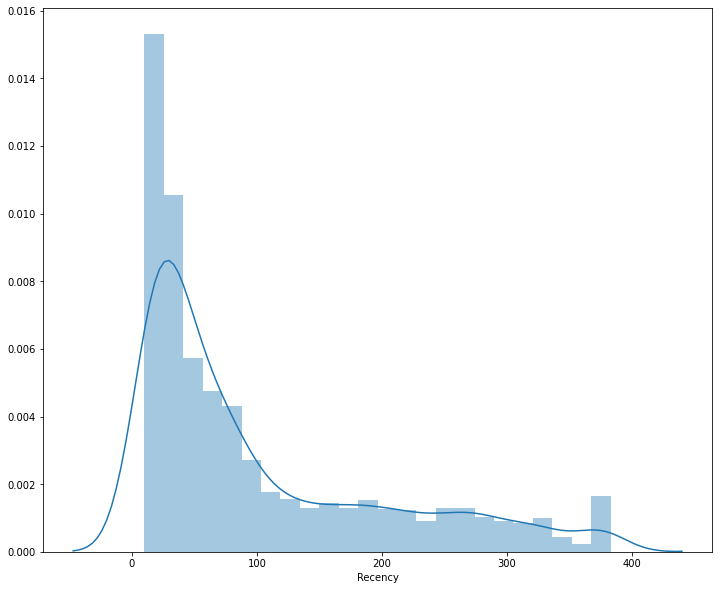

In [64]:
plt.figure(figsize=(12,10))
sns.distplot(df_uk['Recency'])

In [65]:
df_uk[df_uk.duplicated()]

,Recency,Frequency,Monetary
CustomerID,,,


<AxesSubplot:xlabel='Frequency'>

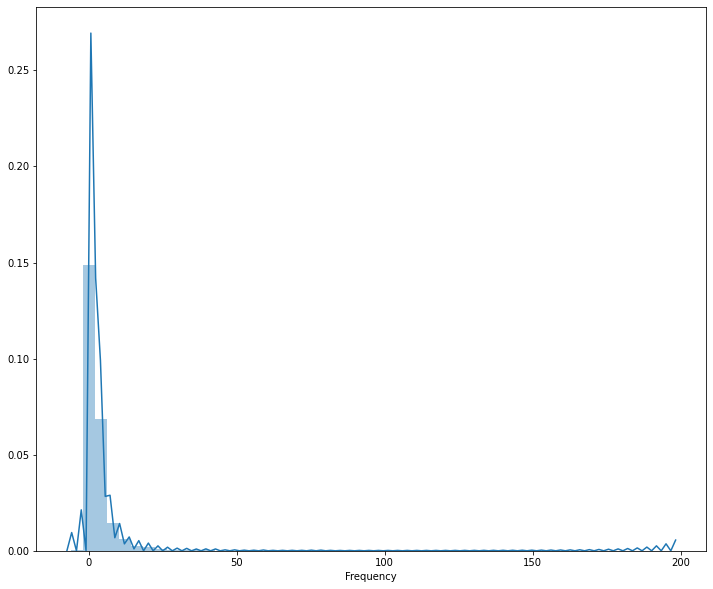

In [66]:
plt.figure(figsize=(12,10))
sns.distplot(df_uk['Frequency'])

<AxesSubplot:xlabel='Monetary'>

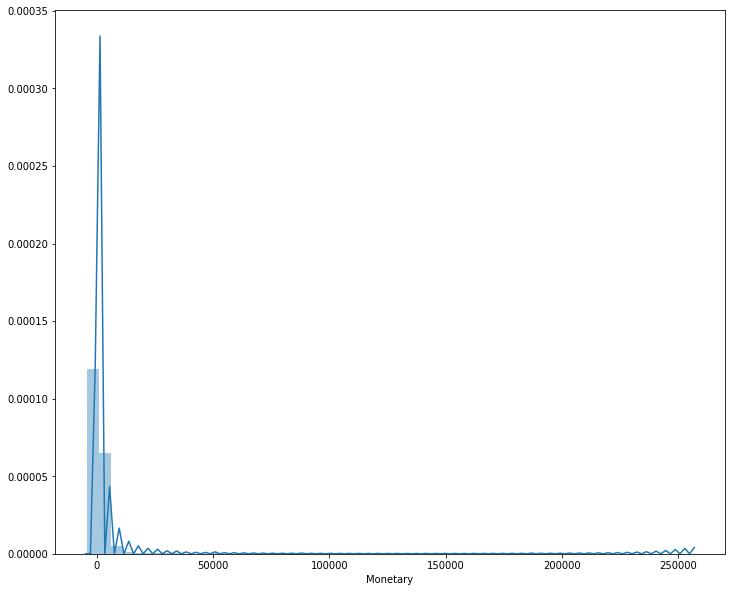

In [67]:
plt.figure(figsize=(12,10))
sns.distplot(df_uk['Monetary'])

### Drop the negative values, because there are some negative frequency and monetary because of data. These data will harm our analysis, and we can't implement log transformation and scaling to the data

In [68]:
df_uk = df_uk[(df_uk > 0).all(1)]

In [69]:
df_uk[df_uk['Monetary'] < 0 ]

,Recency,Frequency,Monetary
CustomerID,,,


In [70]:
df_uk

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,12,11,4196.01
12748.0,10,197,29072.10
12749.0,13,2,3868.20
12820.0,13,4,942.34
12821.0,224,1,92.72
...,...,...,...
18280.0,287,1,180.60
18281.0,190,1,80.82
18282.0,17,1,176.60


# 3. Customer Segmentation with RFM Scores

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.
<br>
<br>
**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

1. Divide the df_rfm into quarters

In [71]:
df_uk["RecencyScore"] = pd.qcut(df_uk["Recency"],5,labels = [5,4,3,2,1])
df_uk["MonetaryScore"] = pd.qcut(df_uk['Monetary'], 5, labels = [1, 2, 3, 4, 5])
df_uk["FrequencyScore"] = pd.qcut(df_uk["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [72]:
df_rfm = df_uk.drop(['Recency', 'Frequency', 'Monetary'], axis = 1)

In [73]:
df_uk = df_uk.drop(['RecencyScore', 'MonetaryScore', 'FrequencyScore'], axis = 1)

In [74]:
df_rfm

,RecencyScore,MonetaryScore,FrequencyScore
CustomerID,,,
12747.0,5,5,5
12748.0,5,5,5
12749.0,5,5,2
12820.0,5,4,4
12821.0,1,1,1
...,...,...,...
18280.0,1,1,2
18281.0,1,1,2
18282.0,5,1,2


In [75]:
df_rfm["RFM_Score"] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str) + df_rfm['MonetaryScore'].astype(str)

In [76]:
df_rfm

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score
CustomerID,,,,
12747.0,5,5,5,555
12748.0,5,5,5,555
12749.0,5,5,2,525
12820.0,5,4,4,544
12821.0,1,1,1,111
...,...,...,...,...
18280.0,1,1,2,121
18281.0,1,1,2,121
18282.0,5,1,2,521


### i. Creating the RFM Segmentation Table


In [77]:
df_rfm

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score
CustomerID,,,,
12747.0,5,5,5,555
12748.0,5,5,5,555
12749.0,5,5,2,525
12820.0,5,4,4,544
12821.0,1,1,1,111
...,...,...,...,...
18280.0,1,1,2,121
18281.0,1,1,2,121
18282.0,5,1,2,521


In [78]:
df_rfm[df_rfm['RFM_Score'] == '111']

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score
CustomerID,,,,
12821.0,1,1,1,111
12831.0,1,1,1,111
12837.0,1,1,1,111
12855.0,1,1,1,111
12902.0,1,1,1,111
...,...,...,...,...
15562.0,1,1,1,111
15607.0,1,1,1,111
15668.0,1,1,1,111


In [79]:
def segment (df_rfm):
    if df_rfm['RFM_Score'] == '555':
        return 'Best Customers'
    if df_rfm['RFM_Score'] == '111':
        return 'Lost Cheap Customers'
    if df_rfm['RecencyScore'] == 1:
        return 'Lost Customers'
    if df_rfm['RecencyScore'] == 2:
        return 'Almost Lost Customers'
    if df_rfm['RecencyScore'] == 3:
        return 'Almost Lost Customers'
    if df_rfm['MonetaryScore'] == 5:
        return 'Big Spenders'
    if df_rfm['FrequencyScore'] == 5:
        return 'Loyal Customers'
    if (df_rfm['RecencyScore'] > 3) & (df_rfm['FrequencyScore'] < 2):
        return 'Focus Group'
    return 'Customers'

In [80]:
df_rfm.apply(segment, axis =1)

CustomerID
12747.0           Best Customers
12748.0           Best Customers
12749.0             Big Spenders
12820.0                Customers
12821.0     Lost Cheap Customers
                   ...          
18280.0           Lost Customers
18281.0           Lost Customers
18282.0                Customers
18283.0           Best Customers
18287.0    Almost Lost Customers
Length: 3650, dtype: object

In [81]:
df_rfm['Segments'] = df_rfm.apply(segment, axis =1)

In [82]:
df_rfm

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments
CustomerID,,,,,
12747.0,5,5,5,555,Best Customers
12748.0,5,5,5,555,Best Customers
12749.0,5,5,2,525,Big Spenders
12820.0,5,4,4,544,Customers
12821.0,1,1,1,111,Lost Cheap Customers
...,...,...,...,...,...
18280.0,1,1,2,121,Lost Customers
18281.0,1,1,2,121,Lost Customers
18282.0,5,1,2,521,Customers


Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales) we can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

In [83]:
df_rfm.groupby('Segments').count()

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score
Segments,,,,
Almost Lost Customers,1446,1446,1446,1446
Best Customers,289,289,289,289
Big Spenders,238,238,238,238
Customers,674,674,674,674
Focus Group,139,139,139,139
Lost Cheap Customers,144,144,144,144
Lost Customers,579,579,579,579
Loyal Customers,141,141,141,141


In [84]:
df_rfm[df_rfm['Segments'] == 'Customers']

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments
CustomerID,,,,,
12820.0,5,4,4,544,Customers
12827.0,5,2,3,532,Customers
12844.0,4,2,2,422,Customers
12882.0,5,4,2,524,Customers
12883.0,4,3,4,443,Customers
...,...,...,...,...,...
18246.0,4,3,3,433,Customers
18249.0,4,1,2,421,Customers
18263.0,4,4,3,434,Customers


# 3. Applying K-Means Clustering

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

In [85]:
df_uk

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,12,11,4196.01
12748.0,10,197,29072.10
12749.0,13,2,3868.20
12820.0,13,4,942.34
12821.0,224,1,92.72
...,...,...,...
18280.0,287,1,180.60
18281.0,190,1,80.82
18282.0,17,1,176.60


Create Heatmap and evaluate the results 

In [86]:
df_uk.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.256522,-0.144397
Frequency,-0.256522,1.000000,0.536491
Monetary,-0.144397,0.536491,1.000000


<AxesSubplot:>

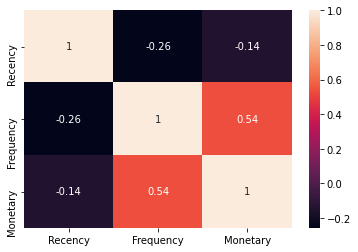

In [87]:
sns.heatmap(df_uk.corr(), annot = True)

### We will use df_uk for K Means. Not df_rfm, just checking.

In [88]:
df_rfm['RecencyScore'] = pd.to_numeric(df_rfm['RecencyScore'])
df_rfm['MonetaryScore'] = pd.to_numeric(df_rfm['MonetaryScore'])
df_rfm['FrequencyScore'] = pd.to_numeric(df_rfm['FrequencyScore'])

In [89]:
df_rfm.corr()

,RecencyScore,MonetaryScore,FrequencyScore
RecencyScore,1.000000,0.468205,0.471327
MonetaryScore,0.468205,1.000000,0.701781
FrequencyScore,0.471327,0.701781,1.000000


<AxesSubplot:>

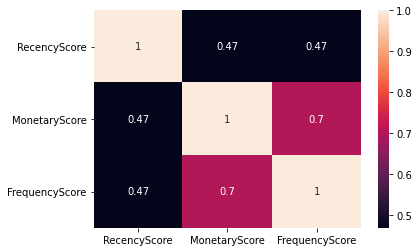

In [90]:
sns.heatmap(df_rfm.corr(), annot = True)

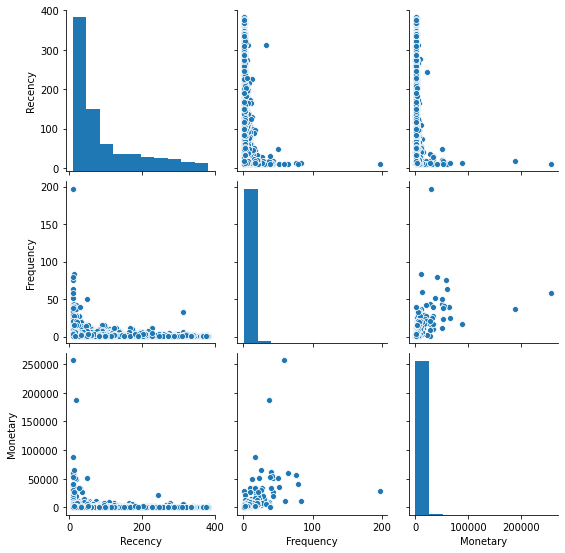

In [91]:
sns.pairplot(df_uk)

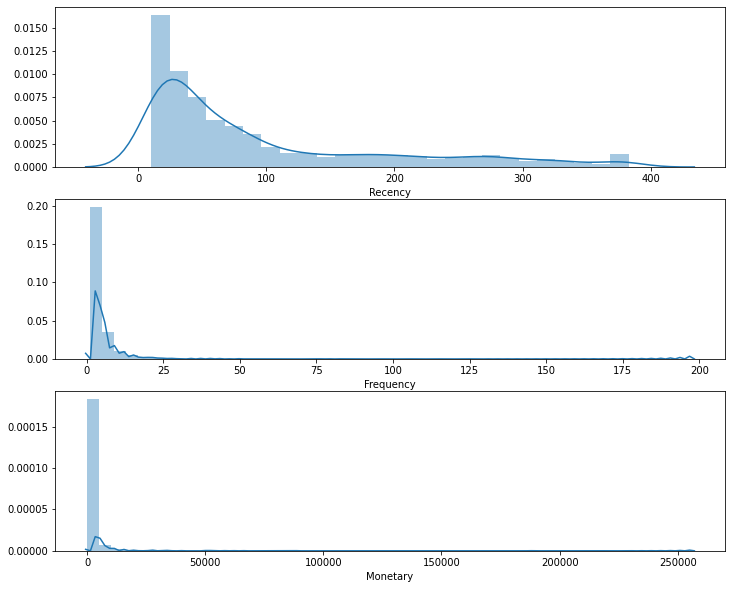

In [92]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df_uk['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_uk['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_uk['Monetary'])
plt.show()

### iii. Data Normalization

1. You can use the logarithm method to normalize the values in a column.

In [93]:
df_log = (np.log(df_uk))

2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

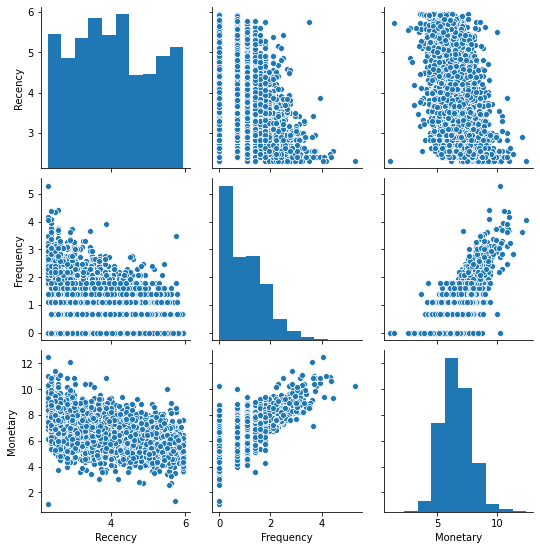

In [94]:
sns.pairplot(df_log)

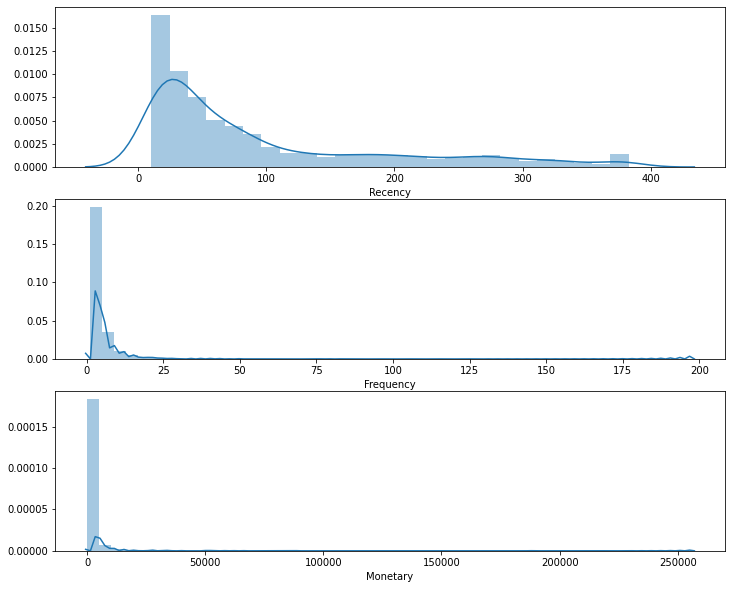

In [95]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df_uk['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_uk['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_uk['Monetary'])
plt.show()

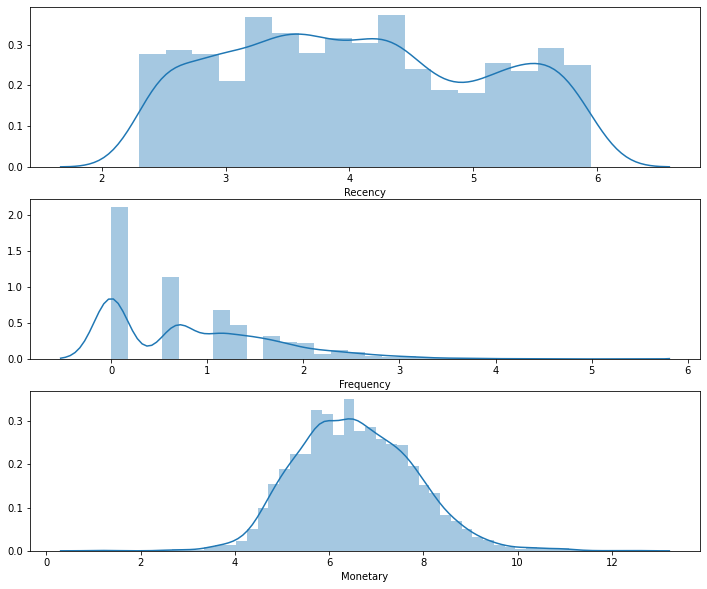

In [96]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df_log['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_log['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_log['Monetary'])
plt.show()

### We need to apply scaling to the data. Log transformation is for make the data normal. With scaling we will make all data standart normal. For distances, for K Means Algorithm.

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_log2 = scaler.fit_transform(df_log)

df_scale = pd.DataFrame(df_log2)
df_scale.columns = df_uk.columns

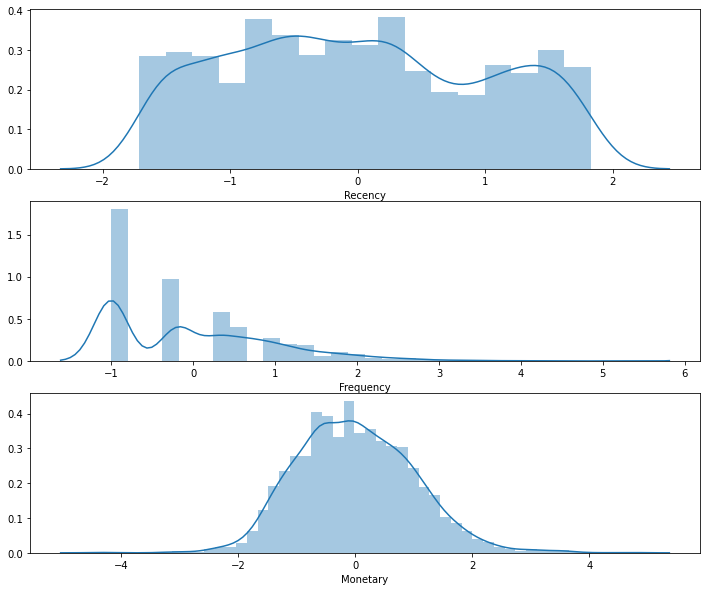

In [98]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df_scale['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_scale['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_scale['Monetary'])
plt.show()

## K-Means Implementation

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

### i. Define the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

In [99]:
from sklearn.cluster import KMeans

In [100]:
from pyclustertend import hopkins

In [101]:
#from sklearn.preprocessing import StandardScaler

In [102]:
#scaler = StandardScaler()
#df_log2 = scaler.fit_transform(df_log)

In [103]:
#df_scale = pd.DataFrame(df_log2)
#df_scale.columns = df_uk.columns

In [104]:
df_log

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,2.484907,2.397895,8.341889
12748.0,2.302585,5.283204,10.277534
12749.0,2.564949,0.693147,8.260545
12820.0,2.564949,1.386294,6.848366
12821.0,5.411646,0.000000,4.529584
...,...,...,...
18280.0,5.659482,0.000000,5.196285
18281.0,5.247024,0.000000,4.392224
18282.0,2.833213,0.000000,5.173887


In [105]:
df_scale

,Recency,Frequency,Monetary
0,-1.536796,1.810553,1.438654
1,-1.713902,5.197367,2.998239
2,-1.459043,-0.190504,1.373113
3,-1.459043,0.623122,0.235294
4,1.306221,-1.004129,-1.632993
...,...,...,...
3645,1.546967,-1.004129,-1.095820
3646,1.146308,-1.004129,-1.743666
3647,-1.198453,-1.004129,-1.113866
3648,-1.459043,2.250373,0.878971


In [106]:
hopkins(df_uk, df_uk.shape[0])

0.004117381082827843

In [107]:
hopkins(df_log, df_log.shape[0])

0.05981173789124492

In [108]:
hopkins(df_scale, df_scale.shape[0])

0.0558380262407047

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [109]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df_scale))
    ssd.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

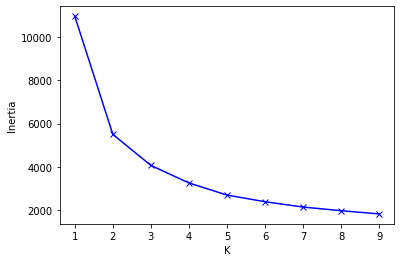

In [110]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")

In [111]:
from yellowbrick.cluster import KElbowVisualizer

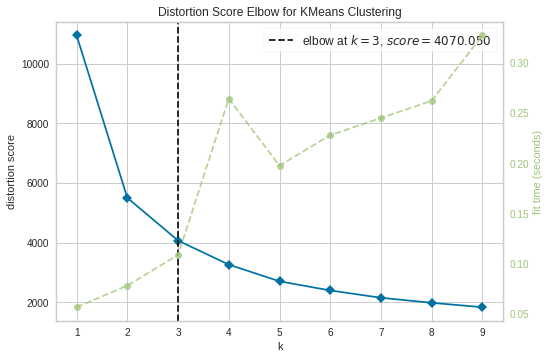

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df_scale)
visu.poof()

In [113]:
kmeans = KMeans(n_clusters = 3).fit(df_scale)

In [114]:
labels = kmeans.labels_

In [115]:
df_scale['cluster_id'] = labels

In [116]:
df_scale['cluster_id'].value_counts()

2    1445
0    1220
1     985
Name: cluster_id, dtype: int64

In [117]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [118]:
print(f'Silhouette Score(n=3): {silhouette_score(df_scale, labels)}')

Silhouette Score(n=3): 0.4832135936425842


<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

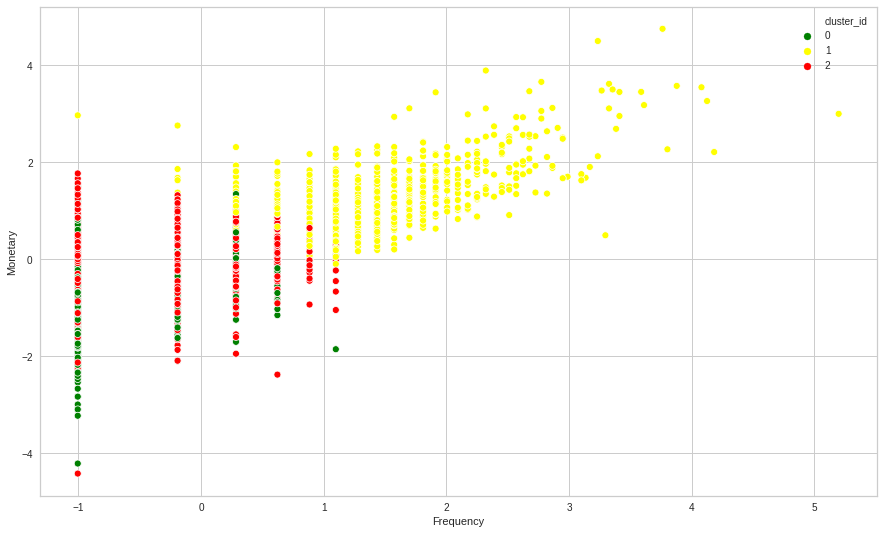

In [119]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Frequency', y='Monetary', hue='cluster_id', data=df_scale, palette=['green','yellow', 'red'], legend='full')

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

<AxesSubplot:xlabel='cluster_id', ylabel='Recency'>

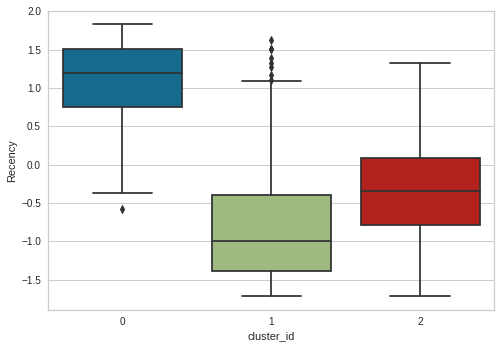

In [120]:
sns.boxplot('cluster_id', 'Recency', data = df_scale)

<AxesSubplot:xlabel='cluster_id', ylabel='Monetary'>

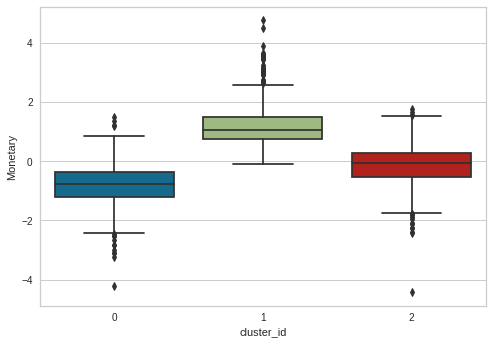

In [121]:
sns.boxplot('cluster_id', 'Monetary', data = df_scale)

<AxesSubplot:xlabel='cluster_id', ylabel='Frequency'>

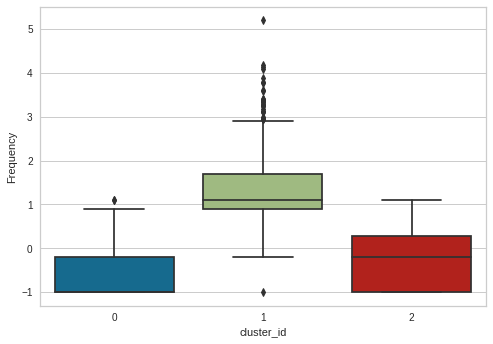

In [122]:
sns.boxplot('cluster_id', 'Frequency', data = df_scale)

### iv. Assign the Label

In [123]:
df_scale.set_index(df_rfm.index, inplace = True)

In [124]:
df_rfm['Labels'] = df_scale['cluster_id']

In [125]:
df_rfm

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels
CustomerID,,,,,,
12747.0,5,5,5,555,Best Customers,1
12748.0,5,5,5,555,Best Customers,1
12749.0,5,5,2,525,Big Spenders,1
12820.0,5,4,4,544,Customers,1
12821.0,1,1,1,111,Lost Cheap Customers,0
...,...,...,...,...,...,...
18280.0,1,1,2,121,Lost Customers,0
18281.0,1,1,2,121,Lost Customers,0
18282.0,5,1,2,521,Customers,2


In [126]:
df_rfm[df_rfm['Labels'] == 1]

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels
CustomerID,,,,,,
12747.0,5,5,5,555,Best Customers,1
12748.0,5,5,5,555,Best Customers,1
12749.0,5,5,2,525,Big Spenders,1
12820.0,5,4,4,544,Customers,1
12823.0,2,4,4,244,Almost Lost Customers,1
...,...,...,...,...,...,...
18257.0,3,5,4,345,Almost Lost Customers,1
18259.0,4,5,4,445,Big Spenders,1
18260.0,1,5,4,145,Lost Customers,1


In [127]:
df_rfm[df_rfm['Labels'] == 0]

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels
CustomerID,,,,,,
12821.0,1,1,1,111,Lost Cheap Customers,0
12829.0,1,2,1,112,Lost Customers,0
12831.0,1,1,1,111,Lost Cheap Customers,0
12833.0,2,2,1,212,Almost Lost Customers,0
12834.0,1,2,1,112,Lost Customers,0
...,...,...,...,...,...,...
18255.0,2,1,2,221,Almost Lost Customers,0
18262.0,2,1,2,221,Almost Lost Customers,0
18278.0,2,1,2,221,Almost Lost Customers,0


In [128]:
df_rfm[df_rfm['Labels'] == 2]

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels
CustomerID,,,,,,
12822.0,2,3,1,213,Almost Lost Customers,2
12824.0,3,2,1,312,Almost Lost Customers,2
12827.0,5,2,3,532,Customers,2
12832.0,3,2,2,322,Almost Lost Customers,2
12838.0,3,3,2,323,Almost Lost Customers,2
...,...,...,...,...,...,...
18265.0,2,3,3,233,Almost Lost Customers,2
18270.0,3,1,2,321,Almost Lost Customers,2
18273.0,5,1,4,541,Customers,2


### We will apply K Means to the df_log to check the difference.

Silhouette Score(n=3): 0.4708012943143144


<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

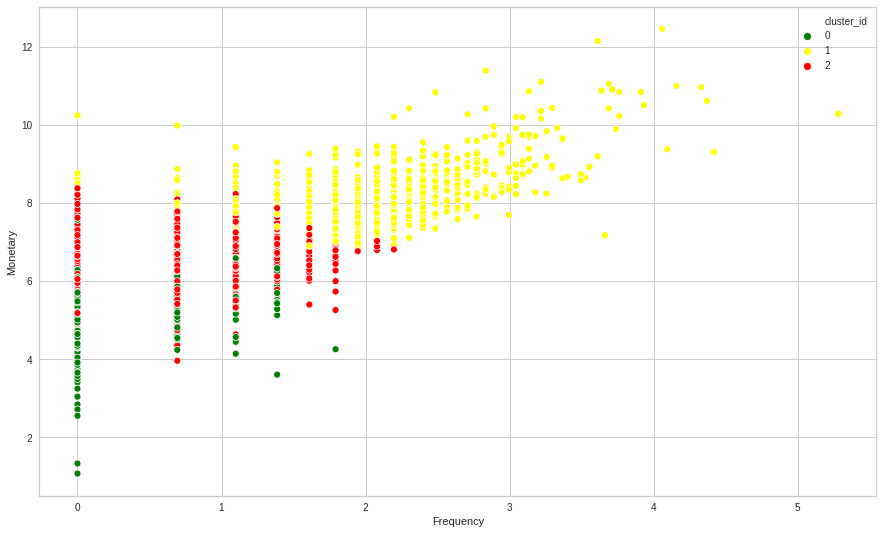

In [129]:
kmeans = KMeans(n_clusters = 3).fit(df_log)

labels = kmeans.labels_

df_log['cluster_id'] = labels

df_log['cluster_id'].value_counts()

from sklearn.metrics import silhouette_samples,silhouette_score

print(f'Silhouette Score(n=3): {silhouette_score(df_log, labels)}')

plt.figure(figsize=(15,9))
sns.scatterplot(x='Frequency', y='Monetary', hue='cluster_id', data=df_log, palette=['green','yellow', 'red'], legend='full')

In [130]:
df_rfm['Clusters'] = df_log['cluster_id']

In [131]:
df_rfm[df_rfm['Clusters'] == 1]

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels,Clusters
CustomerID,,,,,,,
12747.0,5,5,5,555,Best Customers,1,1
12748.0,5,5,5,555,Best Customers,1,1
12749.0,5,5,2,525,Big Spenders,1,1
12823.0,2,4,4,244,Almost Lost Customers,1,1
12826.0,5,4,5,554,Loyal Customers,1,1
...,...,...,...,...,...,...,...
18245.0,5,5,5,555,Best Customers,1,1
18257.0,3,5,4,345,Almost Lost Customers,1,1
18259.0,4,5,4,445,Big Spenders,1,1


In [132]:
df_rfm[df_rfm['Clusters'] == 0]

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels,Clusters
CustomerID,,,,,,,
12821.0,1,1,1,111,Lost Cheap Customers,0,0
12824.0,3,2,1,312,Almost Lost Customers,2,0
12829.0,1,2,1,112,Lost Customers,0,0
12831.0,1,1,1,111,Lost Cheap Customers,0,0
12833.0,2,2,1,212,Almost Lost Customers,0,0
...,...,...,...,...,...,...,...
18262.0,2,1,2,221,Almost Lost Customers,0,0
18270.0,3,1,2,321,Almost Lost Customers,2,0
18278.0,2,1,2,221,Almost Lost Customers,0,0


In [133]:
df_rfm[df_rfm['Clusters'] == 2]

,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels,Clusters
CustomerID,,,,,,,
12820.0,5,4,4,544,Customers,1,2
12822.0,2,3,1,213,Almost Lost Customers,2,2
12827.0,5,2,3,532,Customers,2,2
12832.0,3,2,2,322,Almost Lost Customers,2,2
12838.0,3,3,2,323,Almost Lost Customers,2,2
...,...,...,...,...,...,...,...
18263.0,4,4,3,434,Customers,2,2
18265.0,2,3,3,233,Almost Lost Customers,2,2
18273.0,5,1,4,541,Customers,2,2


In [134]:
df_last = df_rfm.reset_index()
df_last.head(1)

,CustomerID,RecencyScore,MonetaryScore,FrequencyScore,RFM_Score,Segments,Labels,Clusters
0,12747.0,5,5,5,555,Best Customers,1,1


In [135]:
df_last.groupby('Segments')['CustomerID'].nunique().sort_values(ascending = False).reset_index()

,Segments,CustomerID
0,Almost Lost Customers,1446
1,Customers,674
2,Lost Customers,579
3,Best Customers,289
4,Big Spenders,238
5,Lost Cheap Customers,144
6,Loyal Customers,141
7,Focus Group,139


In [136]:
segment = df_last.groupby('Segments')['CustomerID'].nunique().sort_values(ascending = False).reset_index()

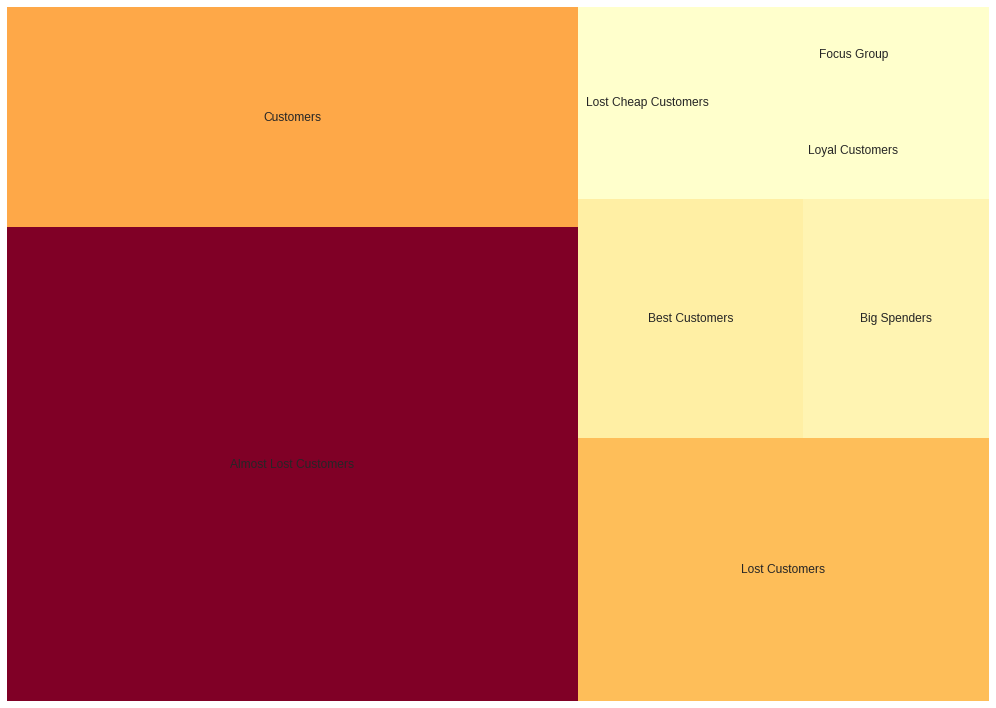

In [137]:
import squarify
import matplotlib
cmap = plt.cm.YlOrRd
mini = min(segment['CustomerID'])
maxi = max(segment['CustomerID'])
norm = matplotlib.colors.Normalize(vmin = mini, vmax = maxi)
colors = [cmap(norm(value)) for value in segment['CustomerID']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)
squarify.plot(sizes = segment['CustomerID'],
             label = segment['Segments'], alpha = 1, color=colors)
plt.axis('off')
plt.tight_layout()

# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

## Future Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [138]:
df_c = df

In [139]:
df_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [140]:
df_c['Month'] = pd.to_datetime((df['InvoiceDate'].dt.year).apply(str) + '-' + (df['InvoiceDate'].dt.month).apply(str) + '-01')

Now we will use the function created above to convert all the invoice dates into respective month date format.

### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, you will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which you'll create it below.

In [141]:
df_c.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


You will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns

In [142]:
grouping = df_c.groupby('CustomerID')['Month']

In [143]:
grouping.head()

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541768   2011-12-01
541769   2011-12-01
541770   2011-12-01
541771   2011-12-01
541772   2011-12-01
Name: Month, Length: 21206, dtype: datetime64[ns]

In [144]:
df_c['CohortMonth'] = grouping.transform('min')
df_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


Use the variables created above to calcualte the difference in days and store them in cohort Index column.

In [145]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

In [146]:
Invoice_Year, Invoice_Month, _ = get_date_int(df_c, 'Month')

In [147]:
Cohort_Year, Cohort_Month , _ = get_date_int(df_c, 'CohortMonth')

In [148]:
Year_Diff = Invoice_Year - Cohort_Year
Month_Diff = Invoice_Month - Cohort_Month

In [149]:
df_c['CohortIndex'] = Year_Diff*12 + Month_Diff +1
df_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5


In [150]:
df_c['CohortIndex'].value_counts()

1     119191
2      29147
4      28075
6      27576
3      27493
5      25926
12     24520
7      24214
8      24200
10     24075
9      23672
11     21331
13      7409
Name: CohortIndex, dtype: int64

In [151]:
cohort_data = df_c.groupby(['CohortMonth', 'CohortIndex']).nunique()[['CustomerID']]
cohort_data = cohort_data.reset_index()
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [152]:
print(df_c.shape) #output: 91, 3
print(cohort_data.shape)#output: 541909, 11

(406829, 12)
(91, 3)


## Create 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [153]:
cohort_counts = cohort_data.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="CustomerID")
retention = cohort_counts
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes

CohortMonth
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [155]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

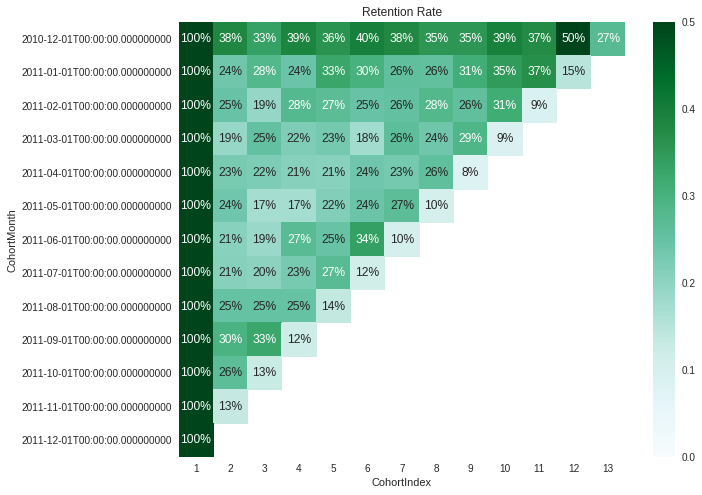

In [157]:
plt.figure(figsize=(10,8))
plt.title("Retention Rate")
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="BuGn")
plt.show()

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

In [158]:
df_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01,5


In [159]:
cohort_q = df_c.groupby(['CohortMonth', 'CohortIndex']).mean()[['Quantity']]
cohort_q = cohort_q.reset_index()
cohort_q

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1,11.037691
1,2010-12-01,2,14.603253
2,2010-12-01,3,14.982141
3,2010-12-01,4,14.801090
4,2010-12-01,5,12.943024
...,...,...,...
86,2011-10-01,2,6.942904
87,2011-10-01,3,7.957001
88,2011-11-01,1,8.680327
89,2011-11-01,2,9.298611


In [160]:
cohort_counts = cohort_q.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="Quantity")
retention = cohort_counts
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.037691,14.603253,14.982141,14.801090,12.943024,14.318095,15.173387,14.759559,16.660455,16.691004,17.264954,12.823263,14.776623
2011-01-01,10.015502,12.573579,12.343099,10.940531,12.234048,14.895373,14.226042,14.385729,11.398390,9.883069,9.090436,9.541612,NaN
2011-02-01,10.830223,12.081317,18.563242,11.959050,11.117223,11.411479,13.346939,12.381845,10.272146,11.945771,12.645977,NaN,NaN
2011-03-01,9.762443,9.924222,12.207366,9.455425,13.579228,12.313412,13.162317,12.177130,10.517494,8.880203,NaN,NaN,NaN
2011-04-01,9.753962,10.105226,9.420617,11.598922,11.488889,8.220785,9.680620,9.289391,7.290019,NaN,NaN,NaN,NaN
2011-05-01,10.866930,9.030276,13.884270,11.805435,10.900268,8.668230,10.148510,7.371571,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.327849,13.681576,10.463847,13.275611,10.232734,9.758786,9.255627,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.722333,12.700952,7.142646,7.844268,6.013594,7.013233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.890294,5.958955,5.345404,5.976259,6.980110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

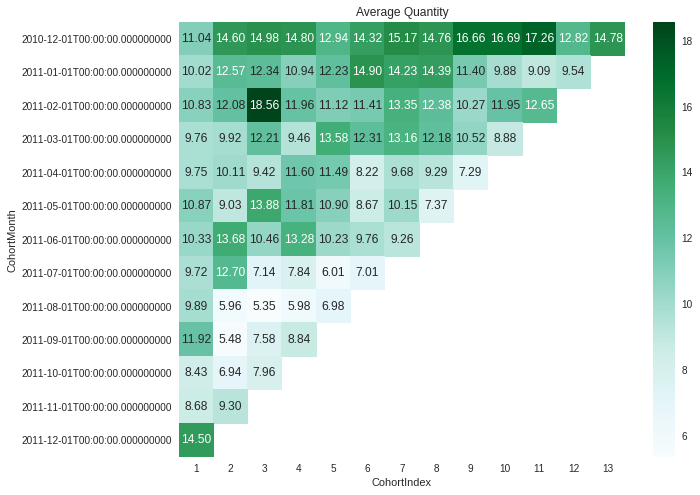

In [161]:
plt.figure(figsize=(10,8))
plt.title("Average Quantity")
sns.heatmap(data=retention,
           annot=True,
            fmt='.2f',
           cmap="BuGn")
plt.show()

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

In [162]:
cohort_s = df_c.groupby(['CohortMonth', 'CohortIndex']).mean()[['Total Price']]
cohort_s = cohort_s.reset_index()
cohort_s

,CohortMonth,CohortIndex,Total Price
0,2010-12-01,1,20.655643
1,2010-12-01,2,24.962459
2,2010-12-01,3,25.139521
3,2010-12-01,4,24.978069
4,2010-12-01,5,19.909629
...,...,...,...
86,2011-10-01,2,10.763085
87,2011-10-01,3,13.538545
88,2011-11-01,1,11.932739
89,2011-11-01,2,12.888481


In [163]:
cohort_counts = cohort_s.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="Total Price")
retention = cohort_counts
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,20.655643,24.962459,25.139521,24.978069,19.909629,25.480250,26.451463,25.372125,25.980501,31.138593,30.557476,22.210825,24.674713
2011-01-01,18.444190,23.481835,20.268516,17.509983,21.525447,25.403550,24.381424,24.532572,18.719978,20.135516,18.672869,18.395317,NaN
2011-02-01,17.014267,16.975981,19.337248,18.776552,16.080564,15.117578,21.616925,20.945285,17.467683,20.649679,21.532575,NaN,NaN
2011-03-01,17.032560,17.850609,21.494776,16.957128,19.195390,18.051934,21.674036,17.294151,15.438267,11.423635,NaN,NaN,NaN
2011-04-01,16.361236,20.154028,18.757005,18.392671,18.642681,14.201767,14.585959,15.300126,11.849341,NaN,NaN,NaN,NaN
2011-05-01,19.033800,15.729252,21.209730,19.444446,17.798882,14.051821,16.136639,13.253142,NaN,NaN,NaN,NaN,NaN
2011-06-01,16.370579,14.504100,18.954229,19.778605,14.994626,15.880308,12.742138,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,13.113629,21.192895,11.378943,12.417094,10.510636,11.448318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.104983,11.892102,11.511685,14.361514,15.627878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

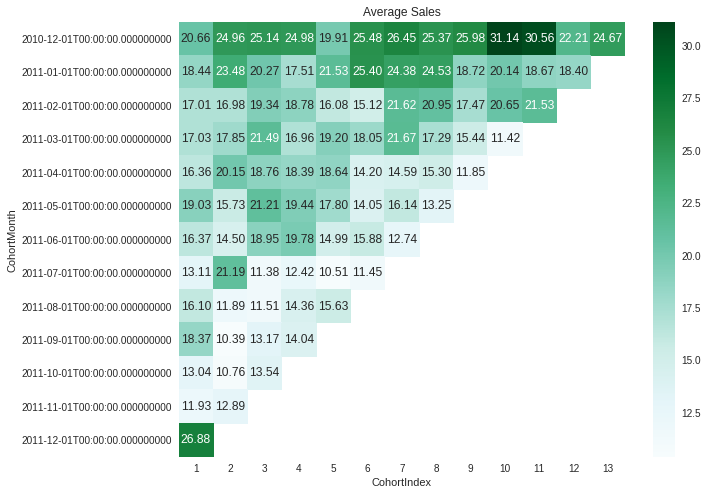

In [164]:
plt.figure(figsize=(10,8))
plt.title("Average Sales")
sns.heatmap(data=retention,
           annot=True,
            fmt='.2f',
           cmap="BuGn")
plt.show()

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?